In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [3]:
df.shape

(100, 3)

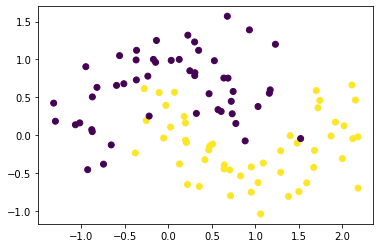

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# model with tanh
model = Sequential()
model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 0.54567486,  0.06836033,  0.6400514 , -0.38580802,  0.48914093,
          0.3031456 ,  0.42518646,  0.40794665, -0.4607539 , -0.35344362],
        [-0.07467645,  0.28273183,  0.04508513,  0.10149044, -0.6134295 ,
          0.07061619, -0.6576323 ,  0.17716378,  0.09118724,  0.1907686 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.28034586, -0.07148644,  0.00949746, -0.13895932,  0.04813015,
         -0.0990068 , -0.3010805 ,  0.49415433, -0.00440419, -0.35379088],
        [ 0.47257185, -0.02951139, -0.16145217,  0.42728043, -0.22068918,
          0.25845748, -0.40061134,  0.24789715,  0.23028302, -0.48946697],
        [ 0.06503963,  0.29832548, -0.41401574,  0.08775908, -0.36230463,
         -0.45918664, -0.52794373,  0.26991075,  0.48654723,  0.29519546],
        [ 0.04365724, -0.32357574, -0.05382818,  0.32930708,  0.24822271,
         -0.15402034, -0.439723  , -0.3363678 ,  0.393968  , -0.07902697],
        [ 0.30254

In [9]:
initial_weights = model.get_weights()
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.57197934, -0.26785088,  0.3649353 , -0.31788397, -1.1778497 ,
         -1.3942379 , -1.0545088 , -0.19465008, -0.5877432 , -0.2209424 ],
        [ 0.5104189 ,  0.24298905,  1.3440497 ,  0.7473213 ,  0.28859222,
          0.90137064,  0.91270256, -1.1327705 ,  0.37010905, -0.7181661 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.08142071,  0.2208439 ,  0.48204833,  0.07026196, -0.2253732 ,
          0.399239  , -0.0547447 , -0.6122972 , -0.09233664, -0.5698074 ],
        [ 0.09617597,  0.16453558,  0.08525529, -0.21206209, -0.15348507,
          0.10459608, -0.4473111 , -0.5551799 , -0.18181424,  0.13648663],
        [-0.20445074,  0.14026839, -0.22798046, -0.23151435, -0.2793431 ,
         -0.24447967, -0.26202193,  0.02942349,  0.26597673, -0.05786949],
        [-0.12499216,  0.6781654 ,  0.1479387 ,  0.03155598, -0.14700772,
         -0.3006972 ,  0.31260407,  0.17143151,  0.40357268,  0.0241426 ],
        [-0.09354

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 7s 221ms/step - loss: 0.6917 - accuracy: 0.5375 - val_loss: 0.6347 - val_accuracy: 0.7000
Epoch 2/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.6674 - accuracy: 0.5625 - val_loss: 0.6076 - val_accuracy: 0.7000
Epoch 3/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.6414 - accuracy: 0.6000 - val_loss: 0.5831 - val_accuracy: 0.8500
Epoch 4/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.6209 - accuracy: 0.7250 - val_loss: 0.5613 - val_accuracy: 0.8500
Epoch 5/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6012 - accuracy: 0.7250 - val_loss: 0.5410 - val_accuracy: 0.8500
Epoch 6/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.5827 - accuracy: 0.7750 - val_loss: 0.5224 - val_accuracy: 0.8500
Epoch 7/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.5666 - accuracy: 0.7750 - val_loss: 0.5051 - val_accuracy: 0.8500
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3743 - accuracy: 0.8625 - val_loss: 0.2719 - val_accuracy: 0.9000
Epoch 60/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.3741 - accuracy: 0.8625 - val_loss: 0.2718 - val_accuracy: 0.9000
Epoch 61/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.3731 - accuracy: 0.8625 - val_loss: 0.2725 - val_accuracy: 0.9000
Epoch 62/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.3727 - accuracy: 0.8625 - val_loss: 0.2738 - val_accuracy: 0.9000
Epoch 63/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3720 - accuracy: 0.8625 - val_loss: 0.2743 - val_accuracy: 0.9000
Epoch 64/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3718 - accuracy: 0.8500 - val_loss: 0.2736 - val_accuracy: 0.9000
Epoch 65/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3710 - accuracy: 0.8500 - val_loss: 0.2741 - val_accuracy: 0.9000
Epoch 

3/3 [==============================] - 0s 32ms/step - loss: 0.3324 - accuracy: 0.8500 - val_loss: 0.2438 - val_accuracy: 0.9500
Epoch 117/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3311 - accuracy: 0.8500 - val_loss: 0.2422 - val_accuracy: 0.9500
Epoch 118/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3300 - accuracy: 0.8500 - val_loss: 0.2415 - val_accuracy: 0.9500
Epoch 119/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.3288 - accuracy: 0.8500 - val_loss: 0.2396 - val_accuracy: 0.9500
Epoch 120/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3293 - accuracy: 0.8500 - val_loss: 0.2370 - val_accuracy: 0.9500
Epoch 121/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3270 - accuracy: 0.8500 - val_loss: 0.2366 - val_accuracy: 0.9500
Epoch 122/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.3251 - accuracy: 0.8500 - val_loss: 0.2372 - val_accuracy: 0.9500
Epoch 123/1000

3/3 [==============================] - 0s 37ms/step - loss: 0.2481 - accuracy: 0.8875 - val_loss: 0.1383 - val_accuracy: 0.9500
Epoch 174/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.2465 - accuracy: 0.8875 - val_loss: 0.1340 - val_accuracy: 0.9500
Epoch 175/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.2452 - accuracy: 0.9000 - val_loss: 0.1307 - val_accuracy: 0.9500
Epoch 176/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.2434 - accuracy: 0.9000 - val_loss: 0.1294 - val_accuracy: 1.0000
Epoch 177/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.2411 - accuracy: 0.9125 - val_loss: 0.1281 - val_accuracy: 1.0000
Epoch 178/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.2399 - accuracy: 0.9125 - val_loss: 0.1300 - val_accuracy: 0.9500
Epoch 179/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.2378 - accuracy: 0.9000 - val_loss: 0.1296 - val_accuracy: 0.9500
Epoch 180/1000

3/3 [==============================] - 0s 34ms/step - loss: 0.1555 - accuracy: 0.9625 - val_loss: 0.0704 - val_accuracy: 1.0000
Epoch 231/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1548 - accuracy: 0.9625 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 232/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1537 - accuracy: 0.9625 - val_loss: 0.0693 - val_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.1536 - accuracy: 0.9625 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1522 - accuracy: 0.9625 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.1507 - accuracy: 0.9625 - val_loss: 0.0679 - val_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1496 - accuracy: 0.9625 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 237/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.1173 - accuracy: 0.9625 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 288/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1168 - accuracy: 0.9625 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 289/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.1161 - accuracy: 0.9625 - val_loss: 0.0491 - val_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.1160 - accuracy: 0.9625 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1154 - accuracy: 0.9625 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.1146 - accuracy: 0.9625 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1145 - accuracy: 0.9625 - val_loss: 0.0588 - val_accuracy: 1.0000
Epoch 294/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.1008 - accuracy: 0.9625 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 345/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0991 - accuracy: 0.9625 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 346/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0999 - accuracy: 0.9625 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 347/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0987 - accuracy: 0.9625 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 348/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0981 - accuracy: 0.9625 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 349/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0980 - accuracy: 0.9625 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0983 - accuracy: 0.9625 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 351/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 402/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0879 - accuracy: 0.9750 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 403/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0882 - accuracy: 0.9750 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 404/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0874 - accuracy: 0.9750 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 405/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0876 - accuracy: 0.9625 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 406/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0876 - accuracy: 0.9625 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0881 - accuracy: 0.9625 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 408/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0791 - accuracy: 0.9750 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0790 - accuracy: 0.9750 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 465/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 516/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 517/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0746 - accuracy: 0.9625 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 518/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0753 - accuracy: 0.9500 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 519/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0743 - accuracy: 0.9625 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 520/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0738 - accuracy: 0.9625 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 521/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0728 - accuracy: 0.9625 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 522/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.0686 - accuracy: 0.9500 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0684 - accuracy: 0.9625 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0683 - accuracy: 0.9625 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0698 - accuracy: 0.9625 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0701 - accuracy: 0.9625 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0698 - accuracy: 0.9625 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 578/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0693 - accuracy: 0.9625 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 579/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0660 - accuracy: 0.9500 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 630/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0657 - accuracy: 0.9625 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 631/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0672 - accuracy: 0.9625 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 632/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0661 - accuracy: 0.9625 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 633/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0661 - accuracy: 0.9625 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 634/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0647 - accuracy: 0.9625 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 635/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0657 - accuracy: 0.9625 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 636/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.0634 - accuracy: 0.9500 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0637 - accuracy: 0.9500 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0642 - accuracy: 0.9500 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0634 - accuracy: 0.9625 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0638 - accuracy: 0.9625 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 691/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0636 - accuracy: 0.9625 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 692/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0632 - accuracy: 0.9750 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 693/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0612 - accuracy: 0.9750 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 744/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0617 - accuracy: 0.9750 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 745/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0611 - accuracy: 0.9750 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 746/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0629 - accuracy: 0.9625 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0624 - accuracy: 0.9500 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 748/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0617 - accuracy: 0.9625 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 749/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0615 - accuracy: 0.9625 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 750/1000

3/3 [==============================] - 0s 29ms/step - loss: 0.0606 - accuracy: 0.9625 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 801/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0611 - accuracy: 0.9625 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 802/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0600 - accuracy: 0.9500 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 803/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0592 - accuracy: 0.9625 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 804/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0602 - accuracy: 0.9625 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 805/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0607 - accuracy: 0.9625 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 806/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0601 - accuracy: 0.9625 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 807/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0596 - accuracy: 0.9500 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0593 - accuracy: 0.9500 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0594 - accuracy: 0.9625 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0601 - accuracy: 0.9625 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0589 - accuracy: 0.9625 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0597 - accuracy: 0.9625 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0594 - accuracy: 0.9625 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 864/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0599 - accuracy: 0.9625 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0610 - accuracy: 0.9625 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0596 - accuracy: 0.9625 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0580 - accuracy: 0.9625 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 918/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0567 - accuracy: 0.9750 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 919/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0569 - accuracy: 0.9625 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0582 - accuracy: 0.9625 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 921/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.0566 - accuracy: 0.9500 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0562 - accuracy: 0.9500 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 973/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0560 - accuracy: 0.9500 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 974/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0562 - accuracy: 0.9625 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 975/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0565 - accuracy: 0.9625 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 976/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0575 - accuracy: 0.9625 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 977/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0566 - accuracy: 0.9625 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 978/1000

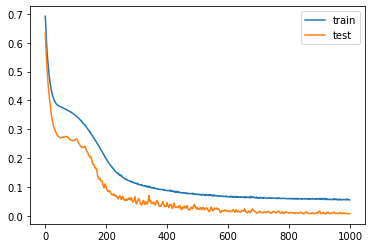

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

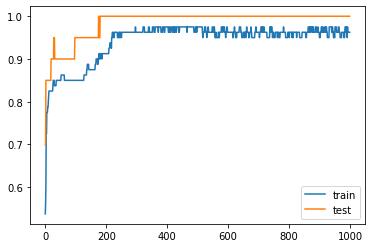

In [13]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

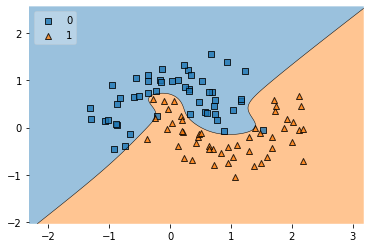

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## tanh with glorot_normal weight initialization

In [15]:
# model with tanh
model = Sequential()
model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.get_weights()

[array([[-0.05117537, -0.44023445,  0.72637314, -0.44826505,  0.25136733,
         -0.12563697,  0.32694954, -0.28009304, -0.04324106, -0.41804582],
        [-0.02123412,  0.519033  , -0.04046765, -0.79738885,  0.4445062 ,
         -0.46466038, -0.41699502, -0.6106317 ,  0.16225211, -0.36167446]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.42276442, -0.08219251, -0.23892072,  0.5381098 , -0.13282171,
          0.16218358, -0.54699993, -0.34028018,  0.27289206, -0.37481922],
        [-0.22045398, -0.21749225, -0.47614914, -0.1271084 , -0.31846976,
          0.11287284, -0.05858889, -0.4653702 , -0.4251278 ,  0.14644474],
        [-0.22712699,  0.4536376 , -0.384111  , -0.48432925,  0.300887  ,
          0.11606216,  0.217731  , -0.16585362, -0.4495266 , -0.0494765 ],
        [ 0.40891397,  0.46870422,  0.37919438, -0.15954328, -0.12143177,
          0.3947271 ,  0.22638184, -0.37367958,  0.539343  ,  0.0347712 ],
        [ 0.46049

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 118ms/step - loss: 0.7031 - accuracy: 0.5500 - val_loss: 0.6299 - val_accuracy: 0.7000
Epoch 2/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.6844 - accuracy: 0.5625 - val_loss: 0.6136 - val_accuracy: 0.7500
Epoch 3/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.6691 - accuracy: 0.5875 - val_loss: 0.5994 - val_accuracy: 0.7500
Epoch 4/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6529 - accuracy: 0.6125 - val_loss: 0.5849 - val_accuracy: 0.8000
Epoch 5/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.6377 - accuracy: 0.6250 - val_loss: 0.5709 - val_accuracy: 0.8000
Epoch 6/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6250 - accuracy: 0.6750 - val_loss: 0.5571 - val_accuracy: 0.8500
Epoch 7/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.6083 - accuracy: 0.7125 - val_loss: 0.5435 - val_accuracy: 0.8500
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3837 - accuracy: 0.8500 - val_loss: 0.2611 - val_accuracy: 0.8500
Epoch 60/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3834 - accuracy: 0.8500 - val_loss: 0.2615 - val_accuracy: 0.8500
Epoch 61/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3831 - accuracy: 0.8500 - val_loss: 0.2615 - val_accuracy: 0.8500
Epoch 62/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3825 - accuracy: 0.8500 - val_loss: 0.2618 - val_accuracy: 0.8500
Epoch 63/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3825 - accuracy: 0.8500 - val_loss: 0.2623 - val_accuracy: 0.8500
Epoch 64/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3820 - accuracy: 0.8500 - val_loss: 0.2625 - val_accuracy: 0.8500
Epoch 65/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3818 - accuracy: 0.8500 - val_loss: 0.2627 - val_accuracy: 0.8500
Epoch 

3/3 [==============================] - 0s 25ms/step - loss: 0.3653 - accuracy: 0.8500 - val_loss: 0.2467 - val_accuracy: 0.8500
Epoch 117/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3644 - accuracy: 0.8500 - val_loss: 0.2468 - val_accuracy: 0.8500
Epoch 118/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3640 - accuracy: 0.8500 - val_loss: 0.2473 - val_accuracy: 0.8500
Epoch 119/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3636 - accuracy: 0.8500 - val_loss: 0.2472 - val_accuracy: 0.9000
Epoch 120/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.3631 - accuracy: 0.8625 - val_loss: 0.2474 - val_accuracy: 0.9000
Epoch 121/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3633 - accuracy: 0.8625 - val_loss: 0.2488 - val_accuracy: 0.9000
Epoch 122/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3625 - accuracy: 0.8625 - val_loss: 0.2485 - val_accuracy: 0.9000
Epoch 123/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.3343 - accuracy: 0.8625 - val_loss: 0.2227 - val_accuracy: 1.0000
Epoch 174/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3329 - accuracy: 0.8625 - val_loss: 0.2242 - val_accuracy: 0.9000
Epoch 175/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3316 - accuracy: 0.8625 - val_loss: 0.2230 - val_accuracy: 0.9000
Epoch 176/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3308 - accuracy: 0.8625 - val_loss: 0.2215 - val_accuracy: 0.9500
Epoch 177/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3300 - accuracy: 0.8625 - val_loss: 0.2199 - val_accuracy: 0.9500
Epoch 178/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3291 - accuracy: 0.8625 - val_loss: 0.2197 - val_accuracy: 1.0000
Epoch 179/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3281 - accuracy: 0.8625 - val_loss: 0.2181 - val_accuracy: 1.0000
Epoch 180/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.2339 - accuracy: 0.9125 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 231/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.2322 - accuracy: 0.9125 - val_loss: 0.1409 - val_accuracy: 1.0000
Epoch 232/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2311 - accuracy: 0.9125 - val_loss: 0.1414 - val_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.2287 - accuracy: 0.9250 - val_loss: 0.1377 - val_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.2267 - accuracy: 0.9250 - val_loss: 0.1327 - val_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.2240 - accuracy: 0.9250 - val_loss: 0.1308 - val_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.2220 - accuracy: 0.9125 - val_loss: 0.1298 - val_accuracy: 1.0000
Epoch 237/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.1545 - accuracy: 0.9500 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 288/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1539 - accuracy: 0.9500 - val_loss: 0.0756 - val_accuracy: 1.0000
Epoch 289/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1530 - accuracy: 0.9500 - val_loss: 0.0721 - val_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1523 - accuracy: 0.9500 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1519 - accuracy: 0.9500 - val_loss: 0.0628 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1511 - accuracy: 0.9500 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.1501 - accuracy: 0.9500 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 294/1000

3/3 [==============================] - 0s 33ms/step - loss: 0.1269 - accuracy: 0.9500 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 345/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1266 - accuracy: 0.9500 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 346/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1276 - accuracy: 0.9500 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 347/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1259 - accuracy: 0.9500 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 348/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1257 - accuracy: 0.9500 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 349/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1252 - accuracy: 0.9500 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1244 - accuracy: 0.9625 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 351/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.1159 - accuracy: 0.9625 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 402/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.1156 - accuracy: 0.9625 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 403/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1164 - accuracy: 0.9625 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 404/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1163 - accuracy: 0.9625 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 405/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1155 - accuracy: 0.9625 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 406/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1149 - accuracy: 0.9625 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1167 - accuracy: 0.9625 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 408/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.1094 - accuracy: 0.9625 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1101 - accuracy: 0.9625 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1116 - accuracy: 0.9625 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1097 - accuracy: 0.9625 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1119 - accuracy: 0.9625 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1112 - accuracy: 0.9625 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1101 - accuracy: 0.9625 - val_loss: 0.0550 - val_accuracy: 1.0000
Epoch 465/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.1053 - accuracy: 0.9625 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 516/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1066 - accuracy: 0.9625 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 517/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1079 - accuracy: 0.9625 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 518/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1083 - accuracy: 0.9625 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 519/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1062 - accuracy: 0.9625 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 520/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.1064 - accuracy: 0.9625 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 521/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1050 - accuracy: 0.9625 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 522/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.1034 - accuracy: 0.9625 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1042 - accuracy: 0.9625 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1022 - accuracy: 0.9625 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1018 - accuracy: 0.9625 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1010 - accuracy: 0.9625 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1019 - accuracy: 0.9625 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 578/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1029 - accuracy: 0.9625 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 579/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0992 - accuracy: 0.9625 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 630/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0990 - accuracy: 0.9625 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 631/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0995 - accuracy: 0.9625 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 632/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0993 - accuracy: 0.9625 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 633/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1000 - accuracy: 0.9625 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 634/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0990 - accuracy: 0.9625 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 635/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0992 - accuracy: 0.9625 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 636/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0977 - accuracy: 0.9625 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0964 - accuracy: 0.9625 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0967 - accuracy: 0.9625 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0967 - accuracy: 0.9625 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0960 - accuracy: 0.9625 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 691/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0969 - accuracy: 0.9625 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 692/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0966 - accuracy: 0.9625 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 693/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0945 - accuracy: 0.9625 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 744/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0933 - accuracy: 0.9625 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 745/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0950 - accuracy: 0.9625 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 746/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0943 - accuracy: 0.9500 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0936 - accuracy: 0.9625 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 748/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0948 - accuracy: 0.9625 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 749/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0928 - accuracy: 0.9625 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 750/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.0925 - accuracy: 0.9625 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 801/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0931 - accuracy: 0.9625 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 802/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0930 - accuracy: 0.9625 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 803/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0920 - accuracy: 0.9625 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 804/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0907 - accuracy: 0.9500 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 805/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0912 - accuracy: 0.9500 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 806/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0908 - accuracy: 0.9625 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 807/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.0884 - accuracy: 0.9625 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0892 - accuracy: 0.9625 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0885 - accuracy: 0.9625 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0879 - accuracy: 0.9625 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0877 - accuracy: 0.9625 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0878 - accuracy: 0.9625 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0871 - accuracy: 0.9625 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 864/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0861 - accuracy: 0.9625 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0851 - accuracy: 0.9625 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0852 - accuracy: 0.9625 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0849 - accuracy: 0.9625 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 918/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0853 - accuracy: 0.9625 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 919/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0850 - accuracy: 0.9625 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0851 - accuracy: 0.9625 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 921/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0802 - accuracy: 0.9750 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 973/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 974/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0805 - accuracy: 0.9625 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 975/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 976/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0801 - accuracy: 0.9625 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 977/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0808 - accuracy: 0.9750 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 978/1000

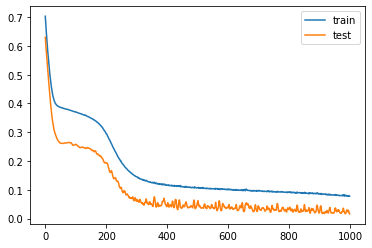

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

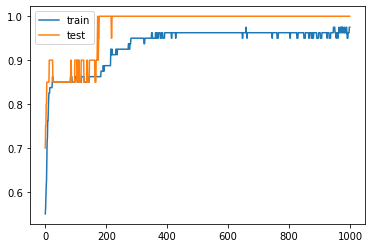

In [19]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

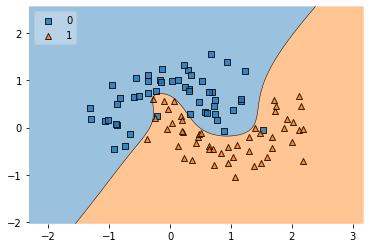

In [20]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## tanh with glorot_uniform weight initialization

In [21]:
# model with tanh
model = Sequential()
model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.get_weights()

[array([[ 3.9475209e-01, -2.8622597e-01, -4.1256189e-02, -2.4783257e-01,
         -6.7928106e-01,  2.1818191e-01,  6.2615496e-01, -2.5674140e-01,
         -9.5978141e-02,  6.6049308e-01],
        [ 2.7588010e-01,  6.2844795e-01,  5.3414828e-01, -2.0670801e-01,
          9.2297196e-02, -7.0022941e-02,  2.5236607e-04, -1.2523764e-01,
          6.9367403e-01,  6.0270411e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.49200845,  0.14702201, -0.5472334 , -0.3748358 ,  0.452942  ,
         -0.14886841, -0.28219825, -0.1479454 , -0.25538254, -0.3568747 ],
        [ 0.21519786, -0.38337266, -0.3926083 ,  0.10720348,  0.3629924 ,
          0.53933907, -0.02220637, -0.42312706,  0.38548607,  0.3704602 ],
        [ 0.42288107, -0.12598729,  0.10360789, -0.15478858,  0.38441503,
          0.3256728 ,  0.2289995 ,  0.2766869 , -0.20246181,  0.04467458],
        [ 0.11455554, -0.22049356, -0.16177788,  0.2936353 , -0.4663162 ,
         -0.1665656 ,

In [23]:
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.00001,
#     patience=40,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False
# )

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 118ms/step - loss: 0.6566 - accuracy: 0.6625 - val_loss: 0.6411 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6370 - accuracy: 0.7375 - val_loss: 0.6160 - val_accuracy: 0.8500
Epoch 3/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6202 - accuracy: 0.7500 - val_loss: 0.5915 - val_accuracy: 0.8500
Epoch 4/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.6030 - accuracy: 0.8000 - val_loss: 0.5686 - val_accuracy: 0.8000
Epoch 5/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.5877 - accuracy: 0.8250 - val_loss: 0.5470 - val_accuracy: 0.8500
Epoch 6/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.5714 - accuracy: 0.8375 - val_loss: 0.5268 - val_accuracy: 0.8500
Epoch 7/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.5567 - accuracy: 0.8250 - val_loss: 0.5073 - val_accuracy: 0.8000
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3804 - accuracy: 0.8625 - val_loss: 0.2740 - val_accuracy: 0.9000
Epoch 60/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3799 - accuracy: 0.8625 - val_loss: 0.2735 - val_accuracy: 0.9000
Epoch 61/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.3796 - accuracy: 0.8625 - val_loss: 0.2728 - val_accuracy: 0.9000
Epoch 62/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3793 - accuracy: 0.8625 - val_loss: 0.2728 - val_accuracy: 0.9000
Epoch 63/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3791 - accuracy: 0.8625 - val_loss: 0.2726 - val_accuracy: 0.9000
Epoch 64/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.3790 - accuracy: 0.8625 - val_loss: 0.2724 - val_accuracy: 0.9000
Epoch 65/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.3785 - accuracy: 0.8625 - val_loss: 0.2731 - val_accuracy: 0.9000
Epoch 

3/3 [==============================] - 0s 25ms/step - loss: 0.3681 - accuracy: 0.8500 - val_loss: 0.2705 - val_accuracy: 0.9000
Epoch 117/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3676 - accuracy: 0.8500 - val_loss: 0.2694 - val_accuracy: 0.9000
Epoch 118/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3673 - accuracy: 0.8500 - val_loss: 0.2694 - val_accuracy: 0.9000
Epoch 119/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.3673 - accuracy: 0.8500 - val_loss: 0.2695 - val_accuracy: 0.9000
Epoch 120/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3669 - accuracy: 0.8500 - val_loss: 0.2681 - val_accuracy: 0.9000
Epoch 121/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3677 - accuracy: 0.8500 - val_loss: 0.2676 - val_accuracy: 0.9000
Epoch 122/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.3664 - accuracy: 0.8500 - val_loss: 0.2667 - val_accuracy: 0.9000
Epoch 123/1000

3/3 [==============================] - 0s 33ms/step - loss: 0.3512 - accuracy: 0.8500 - val_loss: 0.2592 - val_accuracy: 0.9000
Epoch 174/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3509 - accuracy: 0.8500 - val_loss: 0.2607 - val_accuracy: 0.9000
Epoch 175/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3505 - accuracy: 0.8500 - val_loss: 0.2610 - val_accuracy: 0.9000
Epoch 176/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.3504 - accuracy: 0.8500 - val_loss: 0.2622 - val_accuracy: 0.9000
Epoch 177/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.3498 - accuracy: 0.8500 - val_loss: 0.2605 - val_accuracy: 0.9000
Epoch 178/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3494 - accuracy: 0.8500 - val_loss: 0.2594 - val_accuracy: 0.9000
Epoch 179/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3488 - accuracy: 0.8500 - val_loss: 0.2600 - val_accuracy: 0.9000
Epoch 180/1000

3/3 [==============================] - 0s 42ms/step - loss: 0.3163 - accuracy: 0.8625 - val_loss: 0.2370 - val_accuracy: 0.9500
Epoch 231/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.3148 - accuracy: 0.8625 - val_loss: 0.2345 - val_accuracy: 0.9500
Epoch 232/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.3150 - accuracy: 0.8625 - val_loss: 0.2304 - val_accuracy: 0.9500
Epoch 233/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.3136 - accuracy: 0.8750 - val_loss: 0.2286 - val_accuracy: 0.9500
Epoch 234/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3128 - accuracy: 0.8625 - val_loss: 0.2261 - val_accuracy: 0.9500
Epoch 235/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3116 - accuracy: 0.8625 - val_loss: 0.2252 - val_accuracy: 0.9500
Epoch 236/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3103 - accuracy: 0.8750 - val_loss: 0.2286 - val_accuracy: 0.9500
Epoch 237/1000

3/3 [==============================] - 0s 31ms/step - loss: 0.2393 - accuracy: 0.8875 - val_loss: 0.1316 - val_accuracy: 1.0000
Epoch 288/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2368 - accuracy: 0.8875 - val_loss: 0.1306 - val_accuracy: 1.0000
Epoch 289/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.2357 - accuracy: 0.8875 - val_loss: 0.1325 - val_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2333 - accuracy: 0.8875 - val_loss: 0.1295 - val_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2316 - accuracy: 0.8875 - val_loss: 0.1272 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2306 - accuracy: 0.8875 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.2284 - accuracy: 0.8875 - val_loss: 0.1228 - val_accuracy: 1.0000
Epoch 294/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.1672 - accuracy: 0.9375 - val_loss: 0.0833 - val_accuracy: 1.0000
Epoch 345/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1690 - accuracy: 0.9375 - val_loss: 0.0854 - val_accuracy: 1.0000
Epoch 346/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1672 - accuracy: 0.9500 - val_loss: 0.0704 - val_accuracy: 1.0000
Epoch 347/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1682 - accuracy: 0.9375 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 348/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1641 - accuracy: 0.9375 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 349/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1641 - accuracy: 0.9375 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.1646 - accuracy: 0.9375 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 351/1000

3/3 [==============================] - 0s 32ms/step - loss: 0.1383 - accuracy: 0.9375 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 402/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1442 - accuracy: 0.9500 - val_loss: 0.0977 - val_accuracy: 1.0000
Epoch 403/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1451 - accuracy: 0.9375 - val_loss: 0.0920 - val_accuracy: 1.0000
Epoch 404/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.1450 - accuracy: 0.9375 - val_loss: 0.0698 - val_accuracy: 1.0000
Epoch 405/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.1391 - accuracy: 0.9500 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 406/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.1407 - accuracy: 0.9375 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1390 - accuracy: 0.9375 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 408/1000

3/3 [==============================] - 0s 29ms/step - loss: 0.1353 - accuracy: 0.9500 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1342 - accuracy: 0.9500 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1294 - accuracy: 0.9375 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1324 - accuracy: 0.9500 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1358 - accuracy: 0.9500 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1335 - accuracy: 0.9375 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.1298 - accuracy: 0.9375 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 465/1000

3/3 [==============================] - 0s 29ms/step - loss: 0.1275 - accuracy: 0.9375 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 516/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1275 - accuracy: 0.9500 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 517/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1267 - accuracy: 0.9500 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 518/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1252 - accuracy: 0.9375 - val_loss: 0.0496 - val_accuracy: 1.0000
Epoch 519/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1261 - accuracy: 0.9375 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 520/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1293 - accuracy: 0.9500 - val_loss: 0.0382 - val_accuracy: 1.0000
Epoch 521/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1259 - accuracy: 0.9375 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 522/1000

3/3 [==============================] - 0s 32ms/step - loss: 0.1248 - accuracy: 0.9375 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.1235 - accuracy: 0.9500 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.1231 - accuracy: 0.9500 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1243 - accuracy: 0.9500 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1260 - accuracy: 0.9500 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1234 - accuracy: 0.9500 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 578/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1237 - accuracy: 0.9500 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 579/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.1225 - accuracy: 0.9500 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 630/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1223 - accuracy: 0.9500 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 631/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1226 - accuracy: 0.9500 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 632/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1218 - accuracy: 0.9500 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 633/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1213 - accuracy: 0.9500 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 634/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1224 - accuracy: 0.9500 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 635/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1247 - accuracy: 0.9375 - val_loss: 0.0652 - val_accuracy: 1.0000
Epoch 636/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.1214 - accuracy: 0.9500 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1212 - accuracy: 0.9500 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1240 - accuracy: 0.9500 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1211 - accuracy: 0.9500 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.1213 - accuracy: 0.9500 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 691/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.1229 - accuracy: 0.9500 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 692/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1193 - accuracy: 0.9500 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 693/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.1204 - accuracy: 0.9500 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 744/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1176 - accuracy: 0.9625 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 745/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1200 - accuracy: 0.9500 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 746/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1195 - accuracy: 0.9500 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1216 - accuracy: 0.9625 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 748/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1186 - accuracy: 0.9625 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 749/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1178 - accuracy: 0.9625 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 750/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.1179 - accuracy: 0.9625 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 801/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1190 - accuracy: 0.9625 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 802/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1166 - accuracy: 0.9625 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 803/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1156 - accuracy: 0.9625 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 804/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1162 - accuracy: 0.9750 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 805/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1184 - accuracy: 0.9625 - val_loss: 0.0712 - val_accuracy: 1.0000
Epoch 806/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1222 - accuracy: 0.9625 - val_loss: 0.0822 - val_accuracy: 0.9500
Epoch 807/1000

3/3 [==============================] - 0s 34ms/step - loss: 0.1163 - accuracy: 0.9500 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1232 - accuracy: 0.9500 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1227 - accuracy: 0.9500 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.1188 - accuracy: 0.9500 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1176 - accuracy: 0.9625 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.1184 - accuracy: 0.9750 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.1183 - accuracy: 0.9625 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 864/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.1154 - accuracy: 0.9625 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1139 - accuracy: 0.9625 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1144 - accuracy: 0.9625 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1149 - accuracy: 0.9500 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 918/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1159 - accuracy: 0.9500 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 919/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1141 - accuracy: 0.9625 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.1135 - accuracy: 0.9625 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 921/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.1131 - accuracy: 0.9625 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.1122 - accuracy: 0.9625 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 973/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1117 - accuracy: 0.9625 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 974/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1113 - accuracy: 0.9625 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 975/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1111 - accuracy: 0.9625 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 976/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1112 - accuracy: 0.9625 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 977/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1118 - accuracy: 0.9625 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 978/1000

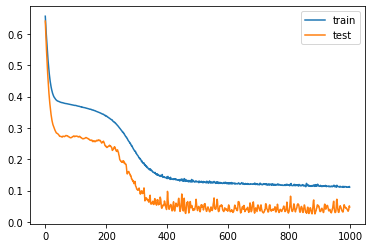

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

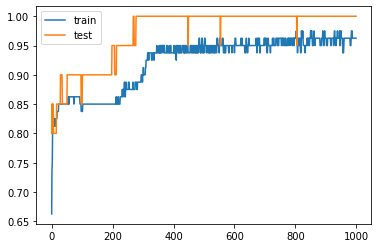

In [26]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

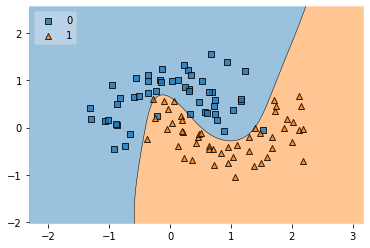

In [27]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## relu with he_normal weight initialization

In [28]:
# model with relu
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_weights()

[array([[ 0.77521884, -0.84635365,  2.02168   , -1.4341894 , -0.67517275,
          1.6575918 , -0.00359144, -0.8350355 ,  0.26966482,  0.30814067],
        [-0.49143904, -2.1653569 ,  1.0200808 , -0.35143763, -1.2476661 ,
          0.0330438 , -1.9025254 , -0.07813337,  1.1474963 ,  0.10531806]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.41439992, -0.14858922,  0.5426333 , -0.28174406,  0.30027843,
         -0.21832868,  0.06551903, -0.38854325,  0.31283516,  0.06583101],
        [-0.47987625,  0.00808829, -0.54148364,  0.24222481,  0.31729424,
         -0.3427121 , -0.47848445,  0.27768385, -0.08128873,  0.06534117],
        [-0.12165219,  0.51977885, -0.09620857,  0.47821212, -0.08814964,
          0.2169711 , -0.311715  ,  0.45861816, -0.39699435,  0.40870464],
        [ 0.14950949, -0.15672755,  0.5197897 ,  0.11945885, -0.39254472,
         -0.29041675, -0.3327188 , -0.02869588, -0.33905202, -0.17705253],
        [ 0.50182

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 117ms/step - loss: 0.7250 - accuracy: 0.5125 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.7083 - accuracy: 0.5250 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.6956 - accuracy: 0.5125 - val_loss: 0.6802 - val_accuracy: 0.5500
Epoch 4/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.6844 - accuracy: 0.5125 - val_loss: 0.6656 - val_accuracy: 0.7000
Epoch 5/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6731 - accuracy: 0.5625 - val_loss: 0.6522 - val_accuracy: 0.8000
Epoch 6/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.6631 - accuracy: 0.6500 - val_loss: 0.6397 - val_accuracy: 0.8000
Epoch 7/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6562 - accuracy: 0.7500 - val_loss: 0.6277 - val_accuracy: 0.8500
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3063 - accuracy: 0.8875 - val_loss: 0.2234 - val_accuracy: 0.9000
Epoch 60/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.3044 - accuracy: 0.8875 - val_loss: 0.2201 - val_accuracy: 0.9000
Epoch 61/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.3033 - accuracy: 0.8875 - val_loss: 0.2164 - val_accuracy: 0.9000
Epoch 62/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.3018 - accuracy: 0.8875 - val_loss: 0.2139 - val_accuracy: 0.9000
Epoch 63/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.2998 - accuracy: 0.8875 - val_loss: 0.2135 - val_accuracy: 0.9000
Epoch 64/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.2982 - accuracy: 0.8875 - val_loss: 0.2124 - val_accuracy: 0.9000
Epoch 65/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.2966 - accuracy: 0.8875 - val_loss: 0.2102 - val_accuracy: 0.9000
Epoch 

3/3 [==============================] - 0s 29ms/step - loss: 0.2307 - accuracy: 0.8875 - val_loss: 0.1310 - val_accuracy: 0.9500
Epoch 117/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.2284 - accuracy: 0.8875 - val_loss: 0.1304 - val_accuracy: 0.9500
Epoch 118/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.2286 - accuracy: 0.8875 - val_loss: 0.1317 - val_accuracy: 0.9500
Epoch 119/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2253 - accuracy: 0.8875 - val_loss: 0.1288 - val_accuracy: 0.9500
Epoch 120/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.2248 - accuracy: 0.8875 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 121/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.2222 - accuracy: 0.8875 - val_loss: 0.1252 - val_accuracy: 0.9500
Epoch 122/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2210 - accuracy: 0.8875 - val_loss: 0.1238 - val_accuracy: 0.9500
Epoch 123/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.1614 - accuracy: 0.9500 - val_loss: 0.0801 - val_accuracy: 0.9500
Epoch 174/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1605 - accuracy: 0.9625 - val_loss: 0.0778 - val_accuracy: 0.9500
Epoch 175/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1598 - accuracy: 0.9625 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 176/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1586 - accuracy: 0.9625 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 177/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1574 - accuracy: 0.9625 - val_loss: 0.0739 - val_accuracy: 1.0000
Epoch 178/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1564 - accuracy: 0.9625 - val_loss: 0.0723 - val_accuracy: 1.0000
Epoch 179/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.1554 - accuracy: 0.9625 - val_loss: 0.0715 - val_accuracy: 1.0000
Epoch 180/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.1196 - accuracy: 0.9625 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 231/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.1187 - accuracy: 0.9625 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 232/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1183 - accuracy: 0.9625 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.1179 - accuracy: 0.9625 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1177 - accuracy: 0.9625 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.1171 - accuracy: 0.9625 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1169 - accuracy: 0.9625 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 237/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.0984 - accuracy: 0.9625 - val_loss: 0.0467 - val_accuracy: 1.0000
Epoch 288/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0984 - accuracy: 0.9625 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 289/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0990 - accuracy: 0.9625 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.0987 - accuracy: 0.9625 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0981 - accuracy: 0.9625 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0970 - accuracy: 0.9625 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0968 - accuracy: 0.9625 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 294/1000

3/3 [==============================] - 0s 38ms/step - loss: 0.0875 - accuracy: 0.9625 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 345/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0866 - accuracy: 0.9625 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 346/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0868 - accuracy: 0.9625 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 347/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0863 - accuracy: 0.9625 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 348/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0872 - accuracy: 0.9625 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 349/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0864 - accuracy: 0.9625 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0857 - accuracy: 0.9625 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 351/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.0821 - accuracy: 0.9500 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 402/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0831 - accuracy: 0.9500 - val_loss: 0.0522 - val_accuracy: 1.0000
Epoch 403/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0805 - accuracy: 0.9625 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 404/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0800 - accuracy: 0.9625 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 405/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0795 - accuracy: 0.9625 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 406/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0800 - accuracy: 0.9625 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0807 - accuracy: 0.9625 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 408/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0756 - accuracy: 0.9625 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0756 - accuracy: 0.9625 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0762 - accuracy: 0.9625 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0762 - accuracy: 0.9625 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0757 - accuracy: 0.9625 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0756 - accuracy: 0.9625 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0755 - accuracy: 0.9625 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 465/1000

3/3 [==============================] - 0s 29ms/step - loss: 0.0726 - accuracy: 0.9625 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 516/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0735 - accuracy: 0.9625 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 517/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0721 - accuracy: 0.9625 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 518/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0714 - accuracy: 0.9625 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 519/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0725 - accuracy: 0.9500 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 520/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0735 - accuracy: 0.9500 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 521/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0728 - accuracy: 0.9500 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 522/1000

3/3 [==============================] - 0s 32ms/step - loss: 0.0703 - accuracy: 0.9625 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0698 - accuracy: 0.9625 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0708 - accuracy: 0.9625 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0695 - accuracy: 0.9625 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0694 - accuracy: 0.9625 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0694 - accuracy: 0.9625 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 578/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0693 - accuracy: 0.9625 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 579/1000

3/3 [==============================] - 0s 44ms/step - loss: 0.0678 - accuracy: 0.9625 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 630/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0673 - accuracy: 0.9500 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 631/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0674 - accuracy: 0.9500 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 632/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.0684 - accuracy: 0.9500 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 633/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0671 - accuracy: 0.9625 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 634/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0688 - accuracy: 0.9500 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 635/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0681 - accuracy: 0.9500 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 636/1000

3/3 [==============================] - 0s 44ms/step - loss: 0.0652 - accuracy: 0.9625 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0650 - accuracy: 0.9750 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0646 - accuracy: 0.9750 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0652 - accuracy: 0.9750 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0652 - accuracy: 0.9625 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 691/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0644 - accuracy: 0.9500 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 692/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0643 - accuracy: 0.9500 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 693/1000

3/3 [==============================] - 0s 38ms/step - loss: 0.0617 - accuracy: 0.9625 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 744/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0640 - accuracy: 0.9750 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 745/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0633 - accuracy: 0.9750 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 746/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0626 - accuracy: 0.9750 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0625 - accuracy: 0.9750 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 748/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0617 - accuracy: 0.9750 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 749/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0645 - accuracy: 0.9500 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 750/1000

3/3 [==============================] - 0s 43ms/step - loss: 0.0606 - accuracy: 0.9625 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 801/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.0613 - accuracy: 0.9625 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 802/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0607 - accuracy: 0.9625 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 803/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0605 - accuracy: 0.9625 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 804/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0609 - accuracy: 0.9625 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 805/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0602 - accuracy: 0.9625 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 806/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0608 - accuracy: 0.9625 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 807/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0587 - accuracy: 0.9625 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0592 - accuracy: 0.9625 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0594 - accuracy: 0.9625 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0596 - accuracy: 0.9625 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0600 - accuracy: 0.9625 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0596 - accuracy: 0.9625 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0594 - accuracy: 0.9625 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 864/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0572 - accuracy: 0.9750 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0563 - accuracy: 0.9625 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0599 - accuracy: 0.9625 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0580 - accuracy: 0.9625 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 918/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0578 - accuracy: 0.9625 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 919/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0582 - accuracy: 0.9625 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0572 - accuracy: 0.9625 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 921/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0562 - accuracy: 0.9625 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0578 - accuracy: 0.9625 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 973/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0560 - accuracy: 0.9625 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 974/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0557 - accuracy: 0.9625 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 975/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0553 - accuracy: 0.9625 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 976/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0557 - accuracy: 0.9625 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 977/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.0559 - accuracy: 0.9625 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 978/1000

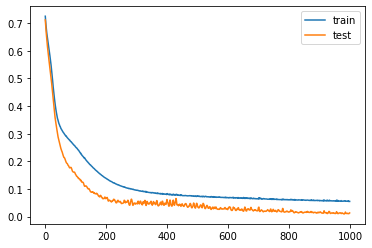

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

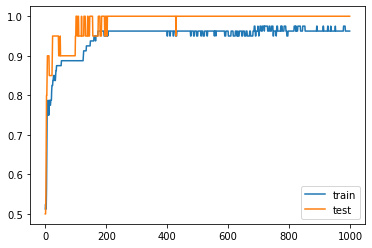

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

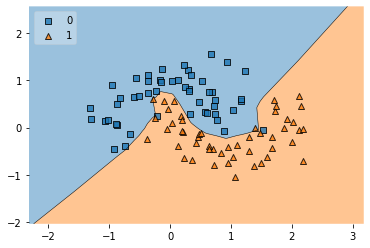

In [33]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## relu with he_uniform weight initialization

In [34]:
# model with relu
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                30        
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.get_weights()

[array([[ 1.6755031 ,  0.8584324 ,  0.08235025, -1.1204181 ,  1.5737311 ,
          0.34343445, -1.6835392 , -1.4103074 , -1.4738519 ,  0.20571172],
        [ 0.12629879, -0.42362666,  0.15582657,  0.75220025, -0.61976457,
          0.8839079 ,  1.6230241 , -1.3573854 , -1.2788749 ,  0.38553393]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.1681692 , -0.29999465,  0.49233735,  0.41531914,  0.02592731,
          0.35031188,  0.45339382, -0.31212974, -0.2537506 ,  0.00449401],
        [ 0.43817502,  0.34462404,  0.5079256 ,  0.0284121 , -0.4705711 ,
          0.15537232, -0.11758479,  0.40862155,  0.4426359 ,  0.48872375],
        [-0.32540107,  0.20021987, -0.38531476, -0.5111366 , -0.32003796,
         -0.4964407 , -0.39145887,  0.20408237, -0.12977132, -0.29301816],
        [ 0.05168408,  0.41947597, -0.03035098, -0.25978464,  0.43080235,
          0.15262085,  0.2126165 , -0.11449745, -0.15794697,  0.14585823],
        [-0.23351

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 114ms/step - loss: 0.7081 - accuracy: 0.4250 - val_loss: 0.7134 - val_accuracy: 0.2500
Epoch 2/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.7026 - accuracy: 0.4250 - val_loss: 0.7060 - val_accuracy: 0.3000
Epoch 3/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.6982 - accuracy: 0.3875 - val_loss: 0.6976 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4000 - val_loss: 0.6896 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.6882 - accuracy: 0.5625 - val_loss: 0.6820 - val_accuracy: 0.6500
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.6832 - accuracy: 0.6500 - val_loss: 0.6750 - val_accuracy: 0.7500
Epoch 7/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.6780 - accuracy: 0.7750 - val_loss: 0.6685 - val_accuracy: 0.7500
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3642 - accuracy: 0.8375 - val_loss: 0.2599 - val_accuracy: 0.9500
Epoch 60/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.3613 - accuracy: 0.8375 - val_loss: 0.2553 - val_accuracy: 0.9500
Epoch 61/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3589 - accuracy: 0.8375 - val_loss: 0.2511 - val_accuracy: 0.9500
Epoch 62/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3558 - accuracy: 0.8375 - val_loss: 0.2468 - val_accuracy: 0.9500
Epoch 63/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3533 - accuracy: 0.8375 - val_loss: 0.2431 - val_accuracy: 0.9500
Epoch 64/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3510 - accuracy: 0.8375 - val_loss: 0.2399 - val_accuracy: 0.9500
Epoch 65/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.3492 - accuracy: 0.8375 - val_loss: 0.2372 - val_accuracy: 0.9500
Epoch 

3/3 [==============================] - 0s 42ms/step - loss: 0.2901 - accuracy: 0.8500 - val_loss: 0.1717 - val_accuracy: 0.9500
Epoch 117/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.2901 - accuracy: 0.8500 - val_loss: 0.1686 - val_accuracy: 0.9500
Epoch 118/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.2893 - accuracy: 0.8500 - val_loss: 0.1658 - val_accuracy: 0.9500
Epoch 119/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2913 - accuracy: 0.8625 - val_loss: 0.1626 - val_accuracy: 0.9500
Epoch 120/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2896 - accuracy: 0.8625 - val_loss: 0.1630 - val_accuracy: 0.9500
Epoch 121/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.2880 - accuracy: 0.8625 - val_loss: 0.1631 - val_accuracy: 0.9500
Epoch 122/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.2866 - accuracy: 0.8625 - val_loss: 0.1649 - val_accuracy: 0.9500
Epoch 123/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.2597 - accuracy: 0.8750 - val_loss: 0.1406 - val_accuracy: 0.9500
Epoch 174/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2581 - accuracy: 0.8750 - val_loss: 0.1424 - val_accuracy: 0.9500
Epoch 175/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2573 - accuracy: 0.8625 - val_loss: 0.1446 - val_accuracy: 0.9500
Epoch 176/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2582 - accuracy: 0.8625 - val_loss: 0.1483 - val_accuracy: 0.9500
Epoch 177/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.2577 - accuracy: 0.8625 - val_loss: 0.1487 - val_accuracy: 0.9500
Epoch 178/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2562 - accuracy: 0.8625 - val_loss: 0.1484 - val_accuracy: 0.9500
Epoch 179/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.2561 - accuracy: 0.8625 - val_loss: 0.1458 - val_accuracy: 0.9500
Epoch 180/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.2252 - accuracy: 0.9250 - val_loss: 0.1197 - val_accuracy: 0.9500
Epoch 231/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.2241 - accuracy: 0.9125 - val_loss: 0.1224 - val_accuracy: 0.9500
Epoch 232/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.2238 - accuracy: 0.9000 - val_loss: 0.1281 - val_accuracy: 0.9500
Epoch 233/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.2239 - accuracy: 0.8875 - val_loss: 0.1304 - val_accuracy: 0.9500
Epoch 234/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.2241 - accuracy: 0.8875 - val_loss: 0.1300 - val_accuracy: 0.9500
Epoch 235/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.2232 - accuracy: 0.8875 - val_loss: 0.1273 - val_accuracy: 0.9500
Epoch 236/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.2223 - accuracy: 0.8875 - val_loss: 0.1221 - val_accuracy: 0.9500
Epoch 237/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.1880 - accuracy: 0.9500 - val_loss: 0.1028 - val_accuracy: 0.9500
Epoch 288/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1863 - accuracy: 0.9500 - val_loss: 0.1056 - val_accuracy: 0.9500
Epoch 289/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1856 - accuracy: 0.9500 - val_loss: 0.1062 - val_accuracy: 0.9500
Epoch 290/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1859 - accuracy: 0.9500 - val_loss: 0.1037 - val_accuracy: 0.9500
Epoch 291/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1844 - accuracy: 0.9500 - val_loss: 0.1086 - val_accuracy: 0.9500
Epoch 292/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1833 - accuracy: 0.9500 - val_loss: 0.1087 - val_accuracy: 0.9500
Epoch 293/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1829 - accuracy: 0.9500 - val_loss: 0.1070 - val_accuracy: 0.9500
Epoch 294/1000

3/3 [==============================] - 0s 32ms/step - loss: 0.1515 - accuracy: 0.9500 - val_loss: 0.0890 - val_accuracy: 0.9500
Epoch 345/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1512 - accuracy: 0.9500 - val_loss: 0.0935 - val_accuracy: 0.9500
Epoch 346/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1507 - accuracy: 0.9500 - val_loss: 0.0961 - val_accuracy: 0.9500
Epoch 347/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1505 - accuracy: 0.9500 - val_loss: 0.0998 - val_accuracy: 0.9500
Epoch 348/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.1501 - accuracy: 0.9500 - val_loss: 0.0991 - val_accuracy: 0.9500
Epoch 349/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1492 - accuracy: 0.9500 - val_loss: 0.0945 - val_accuracy: 0.9500
Epoch 350/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1500 - accuracy: 0.9500 - val_loss: 0.0869 - val_accuracy: 0.9500
Epoch 351/1000

3/3 [==============================] - 0s 36ms/step - loss: 0.1251 - accuracy: 0.9625 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 402/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1254 - accuracy: 0.9500 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 403/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1259 - accuracy: 0.9500 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 404/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1257 - accuracy: 0.9500 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 405/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.1242 - accuracy: 0.9625 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 406/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.1235 - accuracy: 0.9625 - val_loss: 0.0713 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.1231 - accuracy: 0.9625 - val_loss: 0.0708 - val_accuracy: 1.0000
Epoch 408/1000

3/3 [==============================] - 0s 31ms/step - loss: 0.1098 - accuracy: 0.9625 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1095 - accuracy: 0.9625 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1091 - accuracy: 0.9625 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1087 - accuracy: 0.9625 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1093 - accuracy: 0.9625 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1090 - accuracy: 0.9625 - val_loss: 0.0637 - val_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1080 - accuracy: 0.9625 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 465/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.1001 - accuracy: 0.9625 - val_loss: 0.0739 - val_accuracy: 0.9500
Epoch 516/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1034 - accuracy: 0.9625 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 517/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1001 - accuracy: 0.9625 - val_loss: 0.0668 - val_accuracy: 0.9500
Epoch 518/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0988 - accuracy: 0.9625 - val_loss: 0.0847 - val_accuracy: 0.9500
Epoch 519/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.1011 - accuracy: 0.9500 - val_loss: 0.0996 - val_accuracy: 0.9500
Epoch 520/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1015 - accuracy: 0.9500 - val_loss: 0.0948 - val_accuracy: 0.9500
Epoch 521/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0997 - accuracy: 0.9500 - val_loss: 0.0785 - val_accuracy: 0.9500
Epoch 522/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.0957 - accuracy: 0.9500 - val_loss: 0.0825 - val_accuracy: 0.9500
Epoch 573/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0947 - accuracy: 0.9500 - val_loss: 0.0743 - val_accuracy: 0.9500
Epoch 574/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.0939 - accuracy: 0.9625 - val_loss: 0.0632 - val_accuracy: 0.9500
Epoch 575/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0965 - accuracy: 0.9750 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0970 - accuracy: 0.9750 - val_loss: 0.0614 - val_accuracy: 0.9500
Epoch 577/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0965 - accuracy: 0.9750 - val_loss: 0.0574 - val_accuracy: 0.9500
Epoch 578/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0938 - accuracy: 0.9750 - val_loss: 0.0695 - val_accuracy: 0.9500
Epoch 579/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0935 - accuracy: 0.9500 - val_loss: 0.1059 - val_accuracy: 0.9500
Epoch 630/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0929 - accuracy: 0.9500 - val_loss: 0.0853 - val_accuracy: 0.9500
Epoch 631/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0908 - accuracy: 0.9625 - val_loss: 0.0702 - val_accuracy: 0.9500
Epoch 632/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0900 - accuracy: 0.9625 - val_loss: 0.0668 - val_accuracy: 0.9500
Epoch 633/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0910 - accuracy: 0.9750 - val_loss: 0.0621 - val_accuracy: 0.9500
Epoch 634/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0915 - accuracy: 0.9750 - val_loss: 0.0664 - val_accuracy: 0.9500
Epoch 635/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0910 - accuracy: 0.9750 - val_loss: 0.0615 - val_accuracy: 0.9500
Epoch 636/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.0934 - accuracy: 0.9500 - val_loss: 0.0929 - val_accuracy: 0.9500
Epoch 687/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0924 - accuracy: 0.9625 - val_loss: 0.0690 - val_accuracy: 0.9500
Epoch 688/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0868 - accuracy: 0.9750 - val_loss: 0.0706 - val_accuracy: 0.9500
Epoch 689/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0866 - accuracy: 0.9750 - val_loss: 0.0734 - val_accuracy: 0.9500
Epoch 690/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0866 - accuracy: 0.9625 - val_loss: 0.0790 - val_accuracy: 0.9500
Epoch 691/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0890 - accuracy: 0.9500 - val_loss: 0.1019 - val_accuracy: 0.9500
Epoch 692/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0902 - accuracy: 0.9500 - val_loss: 0.1079 - val_accuracy: 0.9500
Epoch 693/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0843 - accuracy: 0.9625 - val_loss: 0.0895 - val_accuracy: 0.9500
Epoch 744/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0842 - accuracy: 0.9625 - val_loss: 0.0842 - val_accuracy: 0.9500
Epoch 745/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0852 - accuracy: 0.9625 - val_loss: 0.0649 - val_accuracy: 0.9500
Epoch 746/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0837 - accuracy: 0.9750 - val_loss: 0.0586 - val_accuracy: 0.9500
Epoch 747/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0860 - accuracy: 0.9750 - val_loss: 0.0541 - val_accuracy: 0.9500
Epoch 748/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0854 - accuracy: 0.9750 - val_loss: 0.0607 - val_accuracy: 0.9500
Epoch 749/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0702 - val_accuracy: 0.9500
Epoch 750/1000

3/3 [==============================] - 0s 30ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0664 - val_accuracy: 0.9500
Epoch 801/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0849 - accuracy: 0.9625 - val_loss: 0.0859 - val_accuracy: 0.9500
Epoch 802/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0807 - accuracy: 0.9625 - val_loss: 0.0843 - val_accuracy: 0.9500
Epoch 803/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0802 - accuracy: 0.9625 - val_loss: 0.0787 - val_accuracy: 0.9500
Epoch 804/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0688 - val_accuracy: 0.9500
Epoch 805/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.0766 - val_accuracy: 0.9500
Epoch 806/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0797 - accuracy: 0.9625 - val_loss: 0.0865 - val_accuracy: 0.9500
Epoch 807/1000

3/3 [==============================] - 0s 33ms/step - loss: 0.0789 - accuracy: 0.9625 - val_loss: 0.0832 - val_accuracy: 0.9500
Epoch 858/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0778 - accuracy: 0.9625 - val_loss: 0.0842 - val_accuracy: 0.9500
Epoch 859/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0787 - accuracy: 0.9625 - val_loss: 0.0832 - val_accuracy: 0.9500
Epoch 860/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0768 - accuracy: 0.9625 - val_loss: 0.0971 - val_accuracy: 0.9500
Epoch 861/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0779 - accuracy: 0.9625 - val_loss: 0.1011 - val_accuracy: 0.9500
Epoch 862/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0794 - accuracy: 0.9625 - val_loss: 0.0893 - val_accuracy: 0.9500
Epoch 863/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0787 - accuracy: 0.9625 - val_loss: 0.0859 - val_accuracy: 0.9500
Epoch 864/1000

3/3 [==============================] - 0s 34ms/step - loss: 0.0758 - accuracy: 0.9750 - val_loss: 0.0878 - val_accuracy: 0.9500
Epoch 915/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0732 - accuracy: 0.9625 - val_loss: 0.1130 - val_accuracy: 0.9500
Epoch 916/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0839 - accuracy: 0.9500 - val_loss: 0.1478 - val_accuracy: 0.9500
Epoch 917/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0835 - accuracy: 0.9375 - val_loss: 0.1276 - val_accuracy: 0.9500
Epoch 918/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0777 - accuracy: 0.9625 - val_loss: 0.0976 - val_accuracy: 0.9500
Epoch 919/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0780 - accuracy: 0.9625 - val_loss: 0.0669 - val_accuracy: 0.9500
Epoch 920/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 0.0560 - val_accuracy: 0.9500
Epoch 921/1000

3/3 [==============================] - 0s 39ms/step - loss: 0.0735 - accuracy: 0.9750 - val_loss: 0.0781 - val_accuracy: 0.9500
Epoch 972/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0732 - accuracy: 0.9750 - val_loss: 0.0839 - val_accuracy: 0.9500
Epoch 973/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0738 - accuracy: 0.9625 - val_loss: 0.1046 - val_accuracy: 0.9500
Epoch 974/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0749 - accuracy: 0.9625 - val_loss: 0.1108 - val_accuracy: 0.9500
Epoch 975/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0742 - accuracy: 0.9625 - val_loss: 0.0946 - val_accuracy: 0.9500
Epoch 976/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0766 - accuracy: 0.9625 - val_loss: 0.0697 - val_accuracy: 0.9500
Epoch 977/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0752 - accuracy: 0.9750 - val_loss: 0.0603 - val_accuracy: 0.9500
Epoch 978/1000

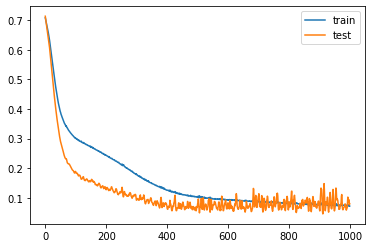

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

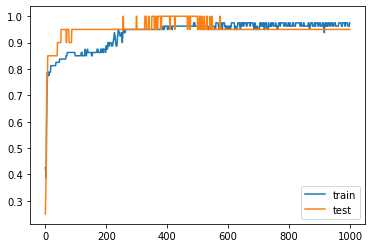

In [38]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

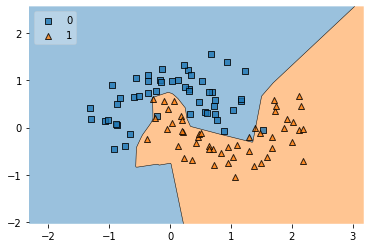

In [39]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)